# Foundamentals of `music21`

In this notebook, we will explore the basic functionalities of the `music21` library, a powerful toolkit for computer-aided musicology. We will cover how to parse symbolic music data, analyze musical structures, and visualize musical scores.

In [1]:
from music21 import (
    articulations,
    chord,
    clef,
    configure,
    converter,
    corpus,
    duration,
    dynamics,
    environment,
    instrument,
    interval,
    key,
    meter,
    note,
    pitch,
    stream,
    tempo,
    tie,
)

## `music21` Corpus

The `music21` library comes with a built-in corpus of musical works that can be easily accessed for analysis and experimentation. Let's start by exploring the corpus and selecting a piece to work with.

In [2]:
# access all available corpora from "bach"
bach_corpus = corpus.getComposer("bach")
print(f"Number of Bach pieces in corpus: {len(bach_corpus)}")

Number of Bach pieces in corpus: 433


In [3]:
# get all file in musicxml
musicxml_files = corpus.getCorePaths(fileExtensions=[".xml", ".mxl", ".musicxml"])
print(f"Number of MusicXML files in corpus: {len(musicxml_files)}")

# the first musicxml file
example_mxl = musicxml_files[0]
print(f"Example MusicXML file: {example_mxl.name}")

Number of MusicXML files in corpus: 654
Example MusicXML file: bwv1.6.mxl


## Configuring `music21`

Music21 can display scores visually using external applications like MuseScore.
This requires one-time configuration to tell music21 where to find MuseScore.

**Step 1: Install MuseScore**

Download and install MuseScore from: https://musescore.org/


Once the installation is complete, we can proceed to configure `music21` to use MuseScore for score rendering.

### Option 1: Using `music21`'s built-in configuration tool

In [ ]:
configure.run()  # open music21 configuration

### Option 2: Manually setting the MuseScore path
If the automatic configuration does not work, you can manually set the path to the MuseScore executable in `music21` as follows:

In [ ]:
# Check current environment settings
env = environment.Environment()

# View current MuseScore path (if set)
print("Current MuseScore path:", env["musescoreDirectPNGPath"])

# Choose the code for your operating system:

## === WINDOWS ===
## Most common path for MuseScore 4
# env["musescoreDirectPNGPath"] = r"C:\Program Files\MuseScore 4\bin\MuseScore4.exe"

## If you have MuseScore 3
# env["musescoreDirectPNGPath"] = r"C:\Program Files\MuseScore 3\bin\MuseScore3.exe"

## === macOS ===
# env["musescoreDirectPNGPath"] = "/Applications/MuseScore 4.app/Contents/MacOS/mscore"

## === Linux ===
# env["musescoreDirectPNGPath"] = "/usr/bin/musescore"

## === LINUX (AppImage) ===
## grant execute permissions to the AppImage if not already done:
## !chmod +x ~/Downloads/MuseScore-Studio-4.6.5.253511702-x86_64.AppImage
# env["musescoreDirectPNGPath"] = (
#     "~/Downloads/MuseScore-Studio-4.6.5.253511702-x86_64.AppImage"
# )


Current MuseScore path: /home/must/Downloads/MuseScore-Studio-4.6.5.253511702-x86_64.AppImage


### Test the configuration and try displaying a score


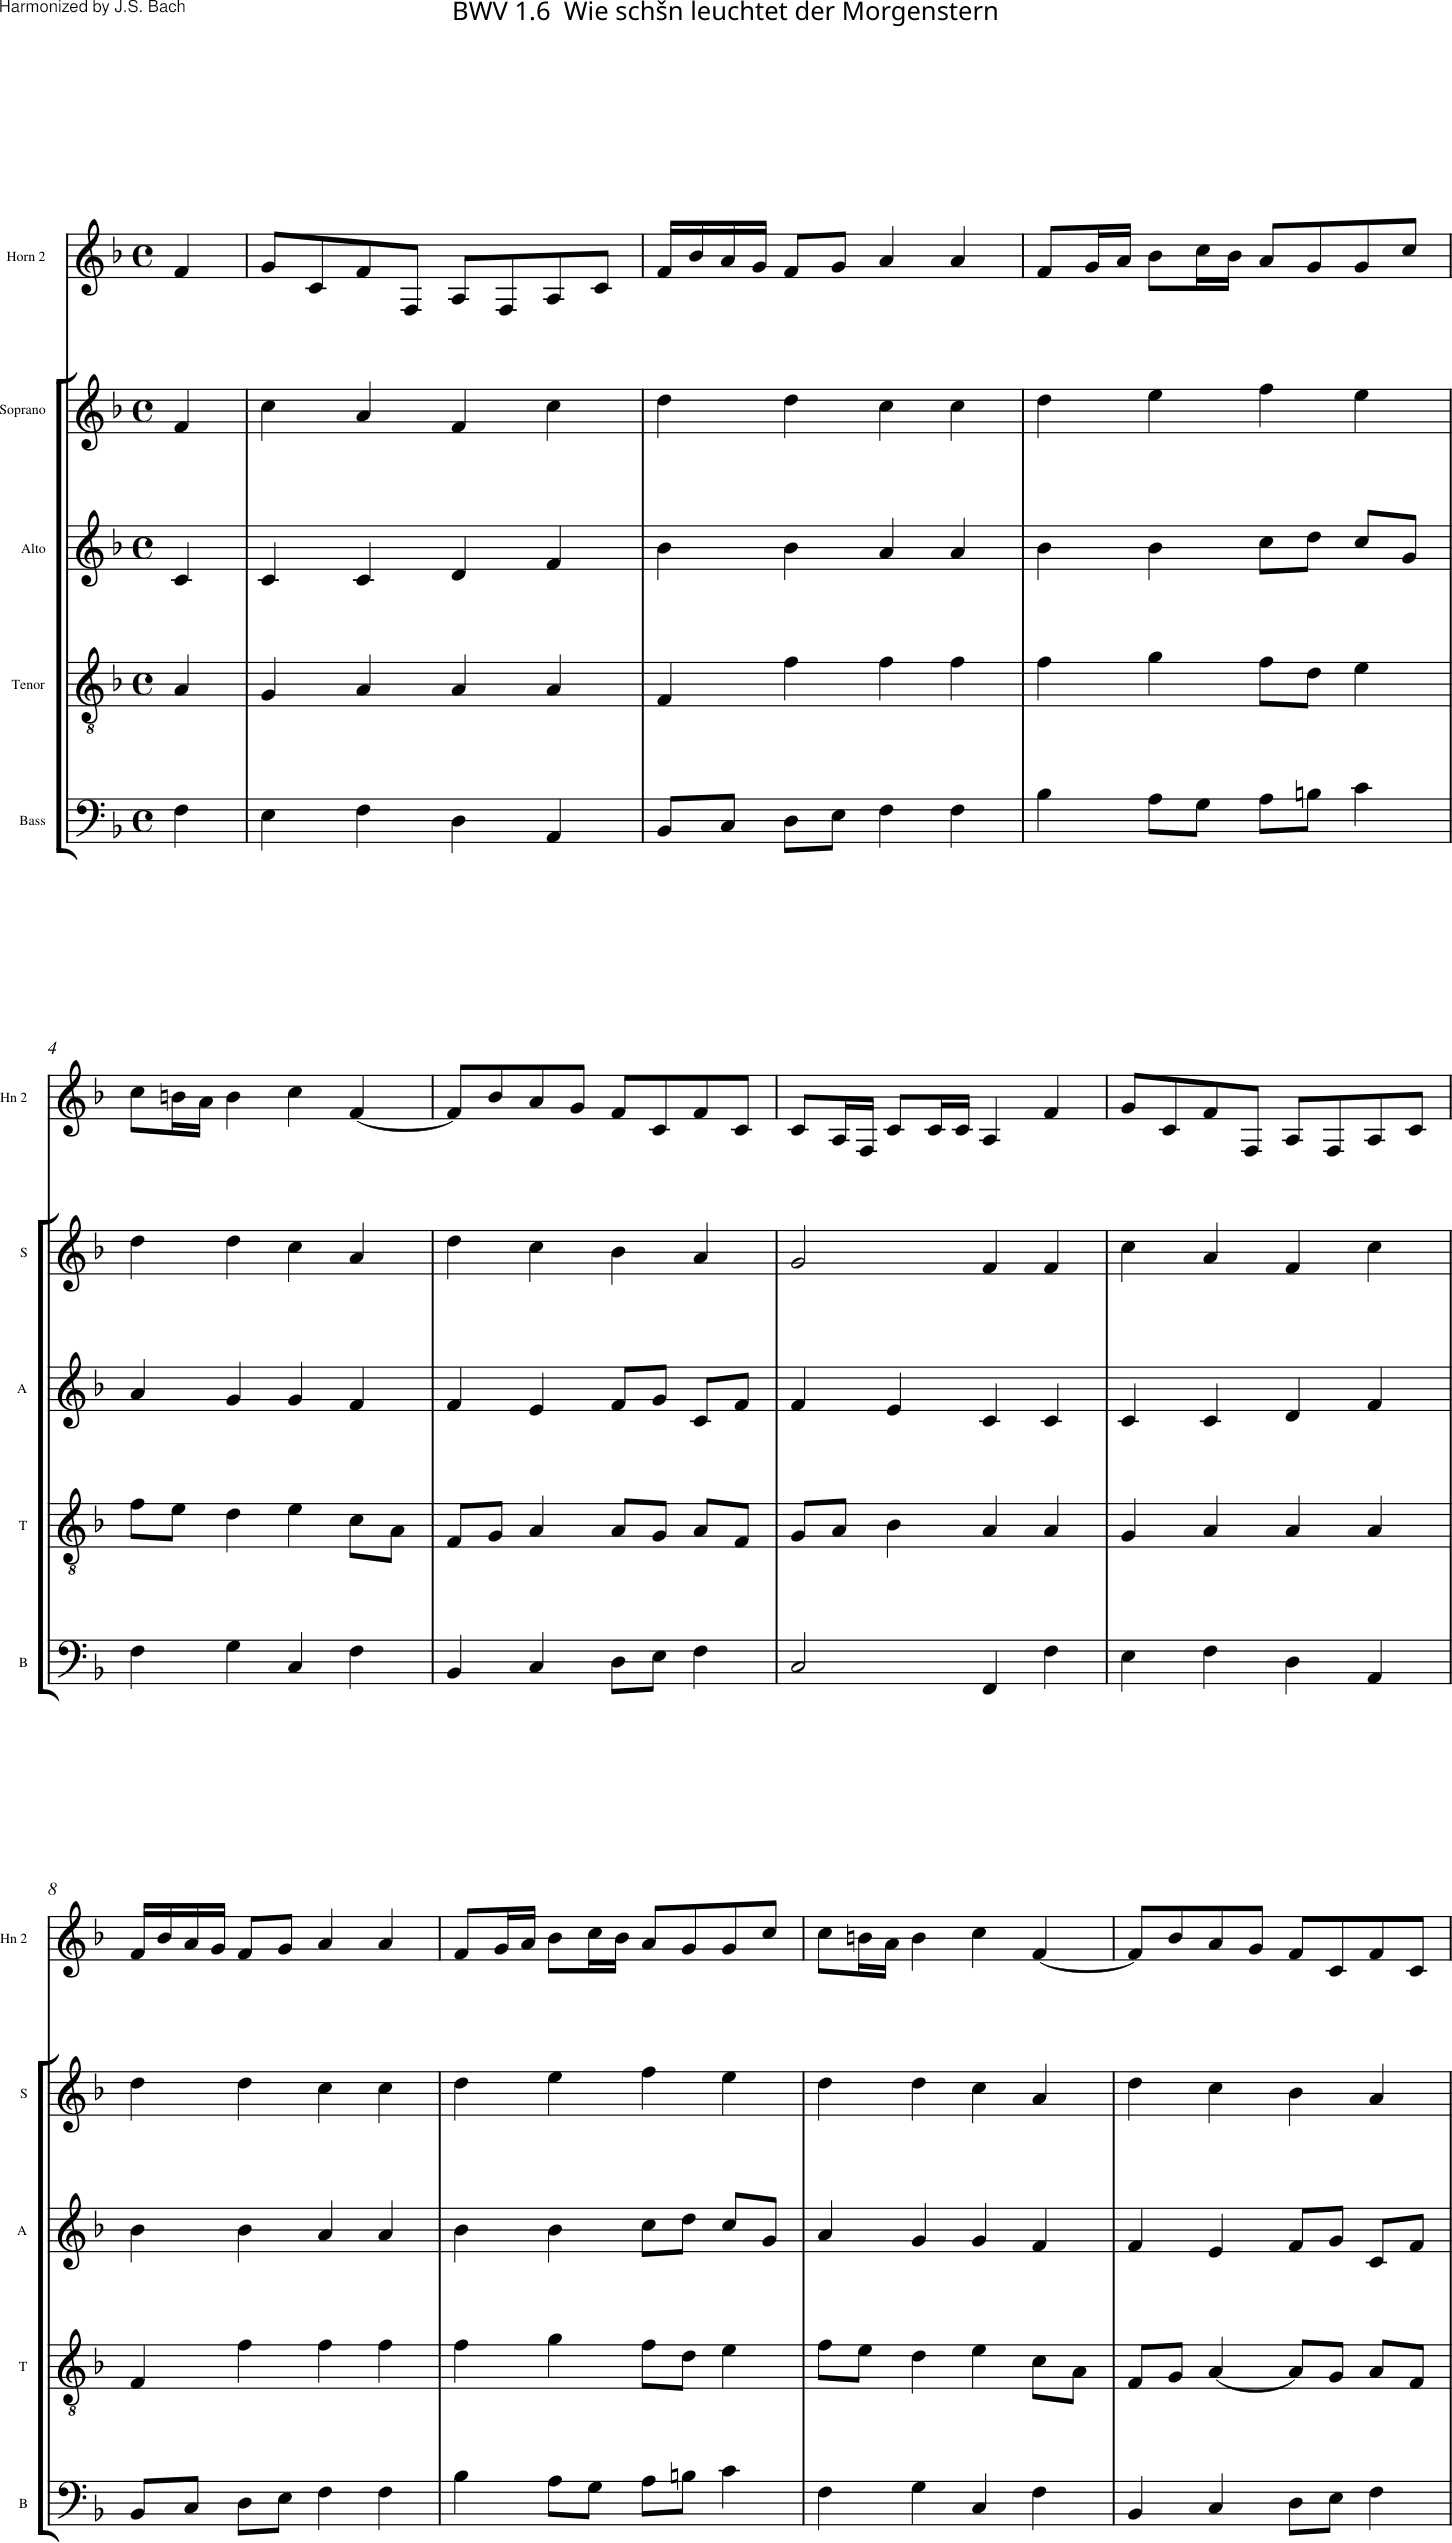

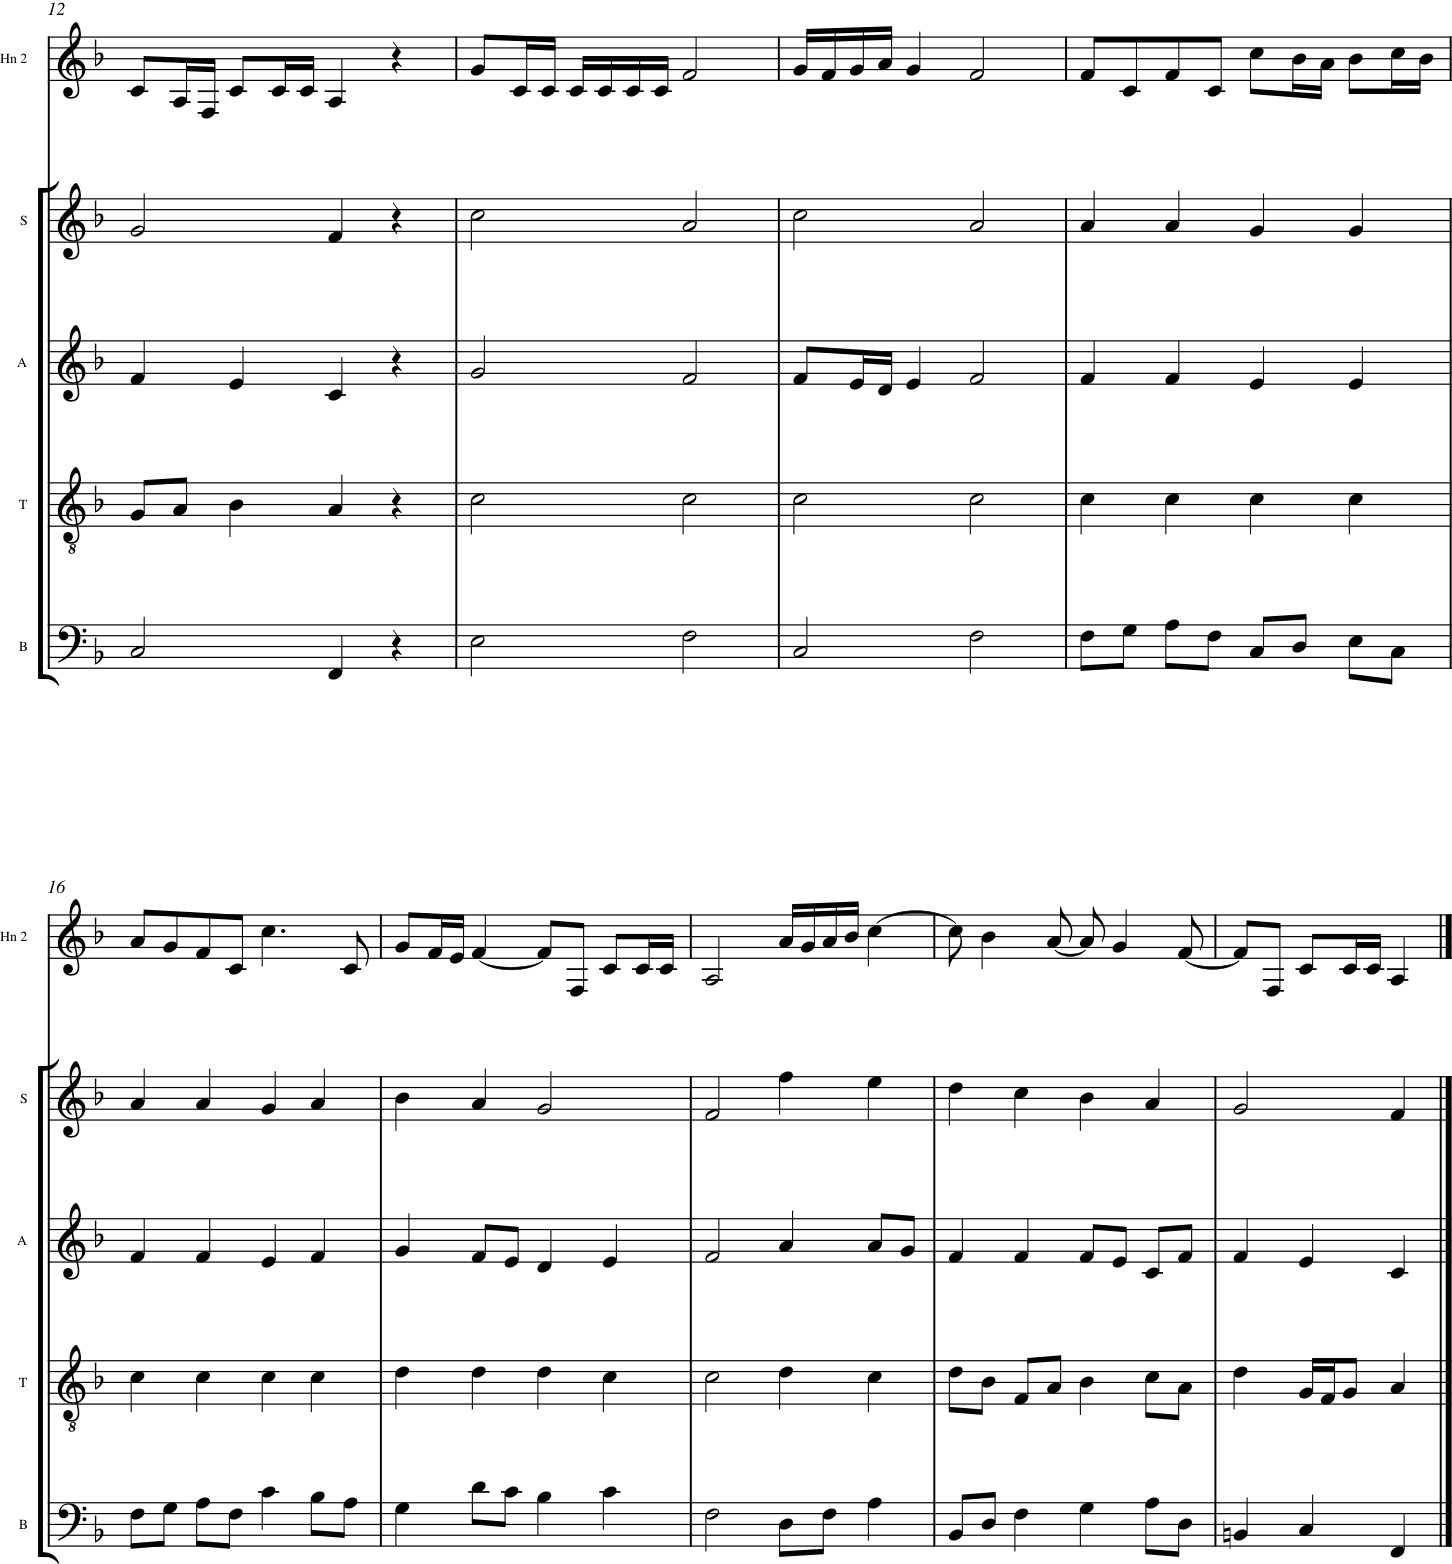

In [6]:
score = converter.parse(example_mxl)
score.show()  # This should open the score in MuseScore if configured correctly

## Basic elements of `music21`

### 1. Pitch and Duration Manipulation

In [7]:
# Create a pitch
p = pitch.Pitch("C4")

print(f"Original pitch: {p.name}")
print(f"Name with octave: {p.nameWithOctave}")
print(f"Frequency: {p.frequency} Hz")
print(f"MIDI number: {p.midi}")

# Transpose
print("\nTRANSPOSITIONS")
p_transposed = p.transpose(5)  # Perfect fourth up
print(f"Transposed up P4: {p_transposed.nameWithOctave}")

# Octave manipulation
p.octave = 5
print(f"Changed octave: {p.nameWithOctave}")

# Microtonal alterations
p.microtone = 50  # 50 cents sharp
print(f"With microtone: {p.nameWithOctave}, {p.microtone} cents")

# Enharmonic equivalents
csharp = pitch.Pitch("C#4")
dflat = pitch.Pitch("D-4")
print(f"\nC# MIDI: {csharp.midi}, D♭ MIDI: {dflat.midi}")
print(f"Enharmonically equivalent: {csharp.midi == dflat.midi}")

Original pitch: C
Name with octave: C4
Frequency: 261.6255653005985 Hz
MIDI number: 60

TRANSPOSITIONS
Transposed up P4: F4
Changed octave: C5
With microtone: C5, (+50c) cents

C# MIDI: 61, D♭ MIDI: 61
Enharmonically equivalent: True


In [8]:
# Create a duration
d = duration.Duration(1.5)  # dotted quarter note
print(f"\nOriginal duration: {d.quarterLength} quarter lengths")
print(f"Original duration type: {d.type}")
print(f"Original duration dots: {d.dots}")

# Modify duration
d.quarterLength = 1.75
print(f"\nModified duration: {d.quarterLength} quarter lengths")
print(f"Modified duration type: {d.type}")
print(f"Modified duration dots: {d.dots}")


Original duration: 1.5 quarter lengths
Original duration type: quarter
Original duration dots: 1

Modified duration: 1.75 quarter lengths
Modified duration type: quarter
Modified duration dots: 2


### 2. Intervals

In [14]:
# Create intervals between notes
n_c = note.Note("C4")
n_g = note.Note("G4")

interval_cg = interval.Interval(noteStart=n_c, noteEnd=n_g)

print(f"Interval: {interval_cg.name}")
print(f"Nice name: {interval_cg.niceName}")
print(f"Generic interval: {interval_cg.generic.value}")
print(f"Semitones: {interval_cg.semitones}")
if interval_cg.direction:
    print(f"Direction: {interval_cg.direction.value}")  # 1=ascending, -1=descending

# Create interval by name
major_second = interval.Interval("M2")
print(f"\nMajor second semitones: {major_second.semitones}")

# Transpose using intervals
n_d = n_c.transpose(major_second)
if n_d:
    print(f"C4 + M2 = {n_d.nameWithOctave}")

Interval: P5
Nice name: Perfect Fifth
Generic interval: 5
Semitones: 7
Direction: 1

Major second semitones: 2
C4 + M2 = D4


### 3. Notes and Rests

In [15]:
# Create a simple melody
n1 = note.Note("C4", quarterLength=1.0)
n2 = note.Note("D4", quarterLength=0.5)
n3 = note.Note("E4", quarterLength=1.5)
r1 = note.Rest(quarterLength=1.0)

for n in [n1, n2, n3, r1]:
    print("Pitch information")
    if isinstance(n, note.Note):
        print(
            f"  - Note: {n.pitch}\n  - Frequency: {n.pitch.frequency:.2f} Hz\n  - Name: {n.name}\n  - Full name: {n.fullName}\n  - Name with octave: {n.nameWithOctave}\n  - MIDI number: {n.pitch.midi}\n  - Octave: {n.octave}"
        )
    elif isinstance(n, note.Rest):
        print("Rest - no pitch information")
    print("Duration information")
    print(
        f"  - Quarter lengths: {n.quarterLength} quarter lengths\n  - Type: {n.duration.type}\n  - Duration full name: {n.duration.fullName}\n  - Is complex duration: {n.duration.isComplex}\n  - Duration components: {n.duration.components}\n  - Dots: {n.duration.dots}"
    )
    print("=" * 40, "\n")

Pitch information
  - Note: C4
  - Frequency: 261.63 Hz
  - Name: C
  - Full name: C in octave 4 Quarter Note
  - Name with octave: C4
  - MIDI number: 60
  - Octave: 4
Duration information
  - Quarter lengths: 1.0 quarter lengths
  - Type: quarter
  - Duration full name: Quarter
  - Is complex duration: False
  - Duration components: (DurationTuple(type='quarter', dots=0, quarterLength=1.0),)
  - Dots: 0

Pitch information
  - Note: D4
  - Frequency: 293.66 Hz
  - Name: D
  - Full name: D in octave 4 Eighth Note
  - Name with octave: D4
  - MIDI number: 62
  - Octave: 4
Duration information
  - Quarter lengths: 0.5 quarter lengths
  - Type: eighth
  - Duration full name: Eighth
  - Is complex duration: False
  - Duration components: (DurationTuple(type='eighth', dots=0, quarterLength=0.5),)
  - Dots: 0

Pitch information
  - Note: E4
  - Frequency: 329.63 Hz
  - Name: E
  - Full name: E in octave 4 Dotted Quarter Note
  - Name with octave: E4
  - MIDI number: 64
  - Octave: 4
Duration

### 4. Chords

In [16]:
# Create chords in different ways
c1 = chord.Chord(["C4", "E4", "G4"])  # C major
c2 = chord.Chord(["C4", "E-4", "G4"])  # C minor
c3 = chord.Chord([60, 64, 67])  # C major using MIDI numbers

print(f"C major pitches: {[p.nameWithOctave for p in c1.pitches]}")
print(f"C minor pitches: {[p.nameWithOctave for p in c2.pitches]}")

# Chord properties
print(f"\nC major commonName: {c1.commonName}")
print(f"C minor commonName: {c2.commonName}")
print(f"Root: {c1.root().nameWithOctave}")
print(f"Bass: {c1.bass().nameWithOctave}")
print(f"Is major triad: {c1.isMajorTriad()}")
print(f"Is minor triad: {c2.isMinorTriad()}")

# Chord inversion
c1.inversion(1)  # First inversion
print(f"\nFirst inversion bass: {c1.bass().nameWithOctave}")
print(f"First inversion pitches: {[p.nameWithOctave for p in c1.pitches]}")


C major pitches: ['C4', 'E4', 'G4']
C minor pitches: ['C4', 'E-4', 'G4']

C major commonName: major triad
C minor commonName: minor triad
Root: C4
Bass: C4
Is major triad: True
Is minor triad: True

First inversion bass: E4
First inversion pitches: ['E4', 'G4', 'C5']


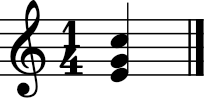

In [17]:
# show the chord
c1.show()  # This should open the chord in MuseScore if configured correctly

### 5. Streams

In [18]:
# Create a stream
melody = stream.Stream()
melody.append(note.Note("C4", quarterLength=1.0))
melody.append(note.Note("D4", quarterLength=1.0))
melody.append(note.Note("E4", quarterLength=1.0))
melody.append(note.Note("F4", quarterLength=1.0))

print(f"Stream has {len(melody)} elements")
print(f"Total duration: {melody.duration.quarterLength} quarter notes")
print(f"Highest time: {melody.highestTime}")

# Access elements
print(f"\nFirst element: {melody[0]}")
print(f"Last element: {melody[-1]}")

# Iterate over elements
print("\nAll pitches:")
for element in melody:
    print(f"  {element.nameWithOctave}")

Stream has 4 elements
Total duration: 4.0 quarter notes
Highest time: 4.0

First element: <music21.note.Note C>
Last element: <music21.note.Note F>

All pitches:
  C4
  D4
  E4
  F4


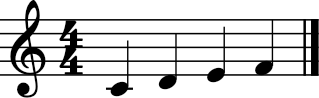

In [19]:
# show the stream
melody.show()  # This should open the melody in MuseScore if configured correctly

In [20]:
# Stream operations

# Filter by type
notes_only = melody.notes  # Returns a stream of notes/chords only
print(f"Notes in stream: {len(notes_only)}")

# Get all pitches
all_pitches = melody.pitches
print(f"Pitches: {[p.nameWithOctave for p in all_pitches]}")

# Offset information (timing)
for element in melody:
    print(f"{element.nameWithOctave} at offset {element.offset}")

# Transpose entire stream
melody_transposed = melody.transpose(5)
if melody_transposed:
    print(
        f"\nTransposed pitches: {[p.nameWithOctave for p in melody_transposed.pitches]}"
    )


Notes in stream: 4
Pitches: ['C4', 'D4', 'E4', 'F4']
C4 at offset 0.0
D4 at offset 1.0
E4 at offset 2.0
F4 at offset 3.0

Transposed pitches: ['F4', 'G4', 'A4', 'B-4']


### 6. Measures and Time Signatures

Measure duration: 4.0
Time signature: 4/4
Bar duration: 4.0


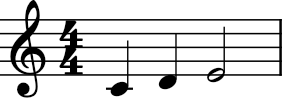

In [23]:
# Create a measure
m1 = stream.Measure(number=1)

# Add time signature
ts = meter.TimeSignature("4/4")  # type: ignore
m1.insert(0, ts)

# Add notes
m1.append(note.Note("C4", quarterLength=1.0))
m1.append(note.Note("D4", quarterLength=1.0))
m1.append(note.Note("E4", quarterLength=2.0))

print(f"Measure duration: {m1.duration.quarterLength}")
if m1.timeSignature:
    print(
        f"Time signature: {m1.timeSignature.numerator}/{m1.timeSignature.denominator}"
    )
print(f"Bar duration: {m1.barDuration.quarterLength}")

# show the measure
m1.show()  # This should open the measure in MuseScore if configured correctly


### 7. Parts and Scores

In [24]:
# Create a score with multiple parts
score = stream.Score()

# Create a part (e.g., violin)
part1 = stream.Part()
part1.id = "violin"
part1.insert(0, instrument.Violin())

# Add measures to part
m1 = stream.Measure(number=1)
m1.append(meter.TimeSignature("3/4"))  # type: ignore
m1.append(note.Note("E5", quarterLength=1.0))
m1.append(note.Note("F5", quarterLength=1.0))
m1.append(note.Note("G5", quarterLength=1.0))
part1.append(m1)

# Create another part (e.g., cello)
part2 = stream.Part()
part2.id = "cello"
part2.insert(0, instrument.Violoncello())

m2 = stream.Measure(number=1)
m2.append(meter.TimeSignature("3/4"))  # type: ignore
m2.append(note.Note("C3", quarterLength=1.5))
m2.append(note.Note("G3", quarterLength=1.5))
part2.append(m2)

# Add parts to score
score.insert(0, part1)
score.insert(0, part2)

print(f"Score has {len(score.parts)} parts")
for i, part in enumerate(score.parts):
    inst = part.getElementsByClass(instrument.Instrument)[0]
    print(f"Part {i}: {inst.instrumentName}")

Score has 2 parts
Part 0: Violin
Part 1: Violoncello


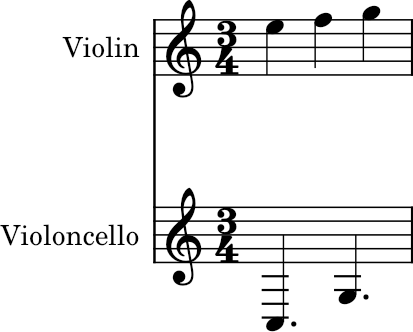

In [25]:
# show the parts
score.show()  # This should open the score in MuseScore if configured correctly

### 8. Key Signatures

In [26]:
# Create key signatures
k_c = key.Key("C")  # C major
k_a = key.Key("a")  # A minor (lowercase for minor)
k_d = key.Key("D")  # D major

print(f"C major: {k_c.sharps} sharps")
print(f"A minor: {k_a.sharps} sharps")
print(f"D major: {k_d.sharps} sharps")

# Get scale degrees
print(f"\nC major scale: {[p.name for p in k_c.pitches]}")

# Relative/parallel keys
print(f"\nC major relative minor: {k_c.relative}")
print(f"C major parallel minor: {k_c.parallel}")

# Analyze key from pitches
mystery_pitches = ["C4", "D4", "E4", "F4", "G4", "A4", "B4"]
mystery_stream = stream.Stream()
for p in mystery_pitches:
    mystery_stream.append(note.Note(p))

analyzed_key = mystery_stream.analyze("key")
print(f"Analyzed key: {analyzed_key}")

C major: 0 sharps
A minor: 0 sharps
D major: 2 sharps

C major scale: ['C', 'D', 'E', 'F', 'G', 'A', 'B', 'C']

C major relative minor: a minor
C major parallel minor: c minor
Analyzed key: a minor


### 9. Clefs

In [38]:
# Different clef types
treble = clef.TrebleClef()
bass = clef.BassClef()
alto = clef.AltoClef()
tenor = clef.TenorClef()

print(f"Treble clef sign: {treble.sign}, line: {treble.line}")
print(f"Bass clef sign: {bass.sign}, line: {bass.line}")
print(f"Alto clef sign: {alto.sign}, line: {alto.line}")
print(f"Tenor clef sign: {tenor.sign}, line: {tenor.line}")

# Add clef to a part
part_with_clef = stream.Part()
part_with_clef.insert(0, bass)
part_with_clef.append(note.Note("C3", quarterLength=4.0))
# add a new clef at measure 1
part_with_clef.append(treble)
part_with_clef.append(note.Note("E4", quarterLength=4.0))

# print the clef changes
print("\nClef changes in the part")
for elem in part_with_clef.recurse().getElementsByClass(clef.Clef):
    print(f"Clef: {elem.sign} at offset {elem.offset}")

Treble clef sign: G, line: 2
Bass clef sign: F, line: 4
Alto clef sign: C, line: 3
Tenor clef sign: C, line: 4

Clef changes in the part
Clef: F at offset 0.0
Clef: G at offset 4.0


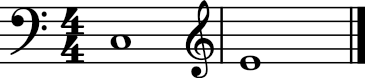

In [39]:
# show all clefs
part_with_clef.show()

### 10. Tempo and Metronome Marks

In [40]:
# Create tempo marking
mm = tempo.MetronomeMark(number=120)  # 120 BPM
print(f"Tempo: {mm.number} BPM")

# Tempo with text
mm_andante = tempo.MetronomeMark(text="Andante", number=76)
print(f"Tempo text: {mm_andante.text}, BPM: {mm_andante.number}")

# Calculate duration in seconds
duration_quarters = 4.0  # 4 quarter notes
duration_seconds = mm.durationToSeconds(duration_quarters)
print(f"4 quarters at 120 BPM = {duration_seconds} seconds")

Tempo: 120 BPM
Tempo text: Andante, BPM: 76
4 quarters at 120 BPM = 2.0 seconds


### 11. Dynamics and Articultations

In [41]:
# Create dynamic markings
dyn_p = dynamics.Dynamic("p")  # Piano
dyn_ff = dynamics.Dynamic("ff")  # Fortissimo

print(f"Piano volume: {dyn_p.volumeScalar}")  # 0.0 to 1.0
print(f"Fortissimo volume: {dyn_ff.volumeScalar}")

# Available dynamics
common_dynamics = ["ppp", "pp", "p", "mp", "mf", "f", "ff", "fff"]
for d_str in common_dynamics:
    d = dynamics.Dynamic(d_str)
    print(f"{d_str}: {d.volumeScalar:.3f}")

Piano volume: 0.35
Fortissimo volume: 0.85
ppp: 0.150
pp: 0.250
p: 0.350
mp: 0.450
mf: 0.550
f: 0.700
ff: 0.850
fff: 0.900


Articulations: ['staccato', 'accent']


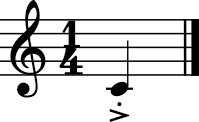

In [42]:
# Create a note with articulation
n = note.Note("C4")
n.articulations.append(articulations.Staccato())
n.articulations.append(articulations.Accent())

print(f"Articulations: {[a.name for a in n.articulations]}")

# Common articulations
staccato = articulations.Staccato()
tenuto = articulations.Tenuto()
accent = articulations.Accent()
marcato = articulations.StrongAccent()

# show the note with articulations
n.show()

### 12. Ties

In [43]:
# Create tied notes
n1 = note.Note("C4", quarterLength=1.0)
n2 = note.Note("C4", quarterLength=1.0)
n1.tie = tie.Tie("start")
n2.tie = tie.Tie("stop")

print(f"First note tie: {n1.tie.type}")
print(f"Second note tie: {n2.tie.type}")


First note tie: start
Second note tie: stop


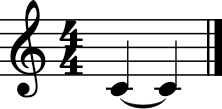

In [44]:
# show ties example
stream.Stream([n1, n2]).show()

### 13. Text and Lyrics

In [44]:
# Add text expression
n = note.Note("C4")
n.addLyric("Hello")
n.addLyric("Hola", 2)  # Second verse

print(f"Lyrics: {n.lyrics}")

Lyrics: [<music21.note.Lyric number=1 syllabic=single text='Hello'>, <music21.note.Lyric number=2 syllabic=single text='Hola'>]


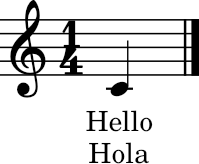

In [45]:
# show score with text
n.show()